In [1]:
import pandas as pd
import numpy as np

df_label = pd.read_csv("TSLA_weekly_return_volatility.csv")
df_trade = pd.read_csv("TSLA.csv")

# Strart trading with 100 dollars
invest = 100

# buy hold function
def buy_hold(invest, buy_in_price, close_price):
    buy_in_amount = invest / buy_in_price
    end_value = round(buy_in_amount * close_price)
    print(f"The final value of the account is {end_value}.")
    
# identify the week of green week
def green_week(df):
    df_label_green = df.loc[(df["label"] == "green")].copy()
    green_week = df_label_green["Week_Number"].tolist()
    return green_week

# calculate trading profit or loss and return daily account balance
def profit_loss_balance(df, invest, green_week):
    
    df = df.copy()
    df["Profit/Loss"] = np.nan
    df["Account Balance"] = np.nan 
    
    for index, row in df.iterrows():
        if index == 0:
            df["Profit/Loss"].iloc[index] = 0
            df["Account Balance"].iloc[index] = invest
            continue
        if row["Week_Number"] in green_week:
            df["Profit/Loss"].iloc[index] = df["Return"].iloc[index] * df["Account Balance"].iloc[index -1]
            df["Account Balance"].iloc[index] = df["Account Balance"].iloc[index - 1] + df["Profit/Loss"].iloc[index] 
        else:
            df["Profit/Loss"].iloc[index] = 0
            df["Account Balance"].iloc[index] = df["Account Balance"].iloc[index - 1]
    return df


# functions for data analyses

# the final weekly balance is the balance remained on the last day of each week
def weekly_balance(df):
    return df.groupby("Week_Number").tail(1).reset_index() 

def avg_weekly_balance(df):
    return round(df["Account Balance"].mean(), 2)

def volatility(df):
    return round(df["Account Balance"].std(), 2)

def min_balance(df):
    min_balance = df["Account Balance"].min()
    min_balance_week = df["Week_Number"].iloc[df["Account Balance"].argmin()]
    print(f"The min balance is {round(min_balance, 2)} on week {min_balance_week}.")

def max_balance(df):
    max_balance = df["Account Balance"].max()
    max_balance_week = df["Week_Number"].iloc[df["Account Balance"].argmax()]
    print(f"The max balance is {round(max_balance, 2)} on week {max_balance_week}.")

def final_balance(df):
    final_balance = df["Account Balance"].iloc[-1]
    print(f"The final balance is {round(final_balance, 2)}.")
    


#### As for green week, buy stock at the adj closing price of previous week. The profit_loss_balance function returns daily profit or loss if in green week, and it also shows the account balance after trading. As for the red week, the profit or loss is 0, so the account balance remains the same as the last day of the green week.


In [11]:
# 2018 data
df_trade_18 = df_trade[(df_trade["Year"] == 2018)].reset_index()
df_label_18 = df_label[(df_label["Year"] == 2018)].reset_index()

# 2019 data
df_trade_19 = df_trade[(df_trade["Year"] == 2019)].reset_index()
df_label_19 = df_label[(df_label["Year"] == 2019)].reset_index()

# 2018 profit or loss and account balance
green_week_18 = green_week(df_label_18)
trade_18 = profit_loss_balance(df_trade_18, invest, green_week_18)

# 2019 profit or loss and account balance
green_week_19 = green_week(df_label_19)
trade_19 = profit_loss_balance(df_trade_19, invest, green_week_19)

## 1. What is the average and volatility of weekly balances? 

In [3]:
# 2018 average and volatility of weekly balance
weekly_balance_18 = weekly_balance(trade_18)
avg_weekly_balance_18 = avg_weekly_balance(weekly_balance_18)
volatility_18 = volatility(weekly_balance_18)
print(f"2018: The average weekly balance is {avg_weekly_balance_18}.\
The volatility of weekly balance is {volatility_18}.")

# 2019 average and volatility of weekly balance
weekly_balance_19 = weekly_balance(trade_19)
avg_weekly_balance_19 = avg_weekly_balance(weekly_balance_19)
volatility_19 = volatility(weekly_balance_19)
print(f"2019: The average weekly balance is {avg_weekly_balance_19}.\
The volatility of weekly balance is {volatility_19}.")

2018: The average weekly balance is 217.79.The volatility of weekly balance is 103.76.
2019: The average weekly balance is 201.44.The volatility of weekly balance is 100.21.


## 2. Plot the "growth" of your account. Week numbers on x, account balance on y

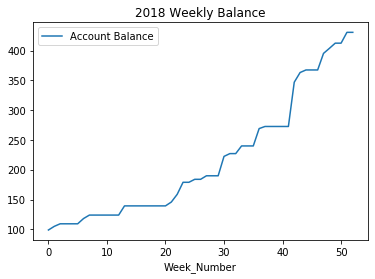

In [4]:
# 2018 weekly balance chart
weekly_balance_18.plot(x = "Week_Number", y = "Account Balance", title = "2018 Weekly Balance")

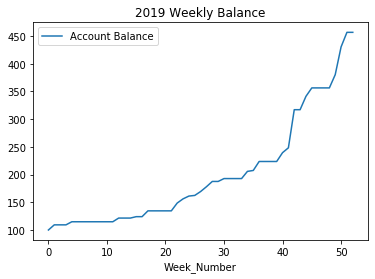

In [5]:
# 2019 weekly balance chart
weekly_balance_19.plot(x = "Week_Number", y = "Account Balance", title = "2019 Weekly Balance")

## 3. What (and when) was the min & max of the account?

In [6]:
print("2018:")
min_balance(weekly_balance_18)
max_balance(weekly_balance_18)

print("\n2019:")
min_balance(weekly_balance_19)
max_balance(weekly_balance_19)


2018:
The min balance is 98.77 on week 0.
The max balance is 430.73 on week 51.

2019:
The min balance is 100.0 on week 0.
The max balance is 456.7 on week 51.


## 4. What was the final value of the account?

In [7]:
print("2018:")
final_balance(weekly_balance_18)

print("\n2019:")
final_balance(weekly_balance_19)

2018:
The final balance is 430.73.

2019:
The final balance is 456.7.


## 5. What was the maximum duration (in weeks) that your account was growing and what was the maximum duration(in weeks) that your account was decreasing in value?

#### Because I only invest money when the adj closing price on the last day of the week is higher than on the last day of previous week, and change into cash when the stock market goes down or in large fluctuation. In other words, when I put money in the stock market, I earn profits. Also, the trending of TSLA stock price is promising. As from time to time I earn profits from stock investment , my account balance keeps increasing without lossing money.

## Extra: Compare the investment strategy with a buy-hold strategy

In [8]:
# 2018 buy hold 
print("2018:")
buy_hold(invest, df_trade_18["Adj Close"].iloc[0], df_trade_18["Adj Close"].iloc[-1])

# 2019 buy hold
print("\n2019:")
buy_hold(invest, df_trade_19["Adj Close"].iloc[0], df_trade_19["Adj Close"].iloc[-1])

# Invest in stock market with the closing price on the first day of the year.
# Wait and do nothing but sell the stock at the end of the year. 

2018:
The final value of the account is 104.0.

2019:
The final value of the account is 135.0.


#### With buy-hold strategy, the end values of the account for both year are still about a hundred dollar, which means the profits are quite less after deducting the investment. As for the investment strategy, the final value of the account for both year increased by 4 times of initial investment, indicating that the ROI is over 300%. Therefore, the investment strategy is much better than buy-hold strategy. 

In [ ]:
# save 18 19 results
df_trade_18_19 = df_trade[(df_trade["Year"] >= 2018)].reset_index()
df_label_18_19 = df_label[(df_label["Year"] >= 2018)].reset_index()
green_week_18_19 = green_week(df_label_18_19)
trade_18_19 = profit_loss_balance(df_trade_18_19, invest, green_week_18_19)
trade_18_19.to_csv(r"trade_18_19.csv")